# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Herlinda Sundari
- **Email:** herlindasundari@gmail.com
- **ID Dicoding:** herlind

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca memengaruhi jumlah sepeda yang disewa?
- Musim apa yang memiliki rata-rata penyewaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

**Background:**
> Bike-sharing system adalah sistem persewaan sepeda otomatis yang mencatat data perjalanan secara detail, termasuk waktu keberangkatan, kedatangan, dan durasi perjalanan.

**Sumber Data:**
> Dataset mencakup data dua tahun (2011-2012) dari sistem Capital Bikeshare di Washington D.C.

**Struktur Dataset:**
> Waktu dan Musim:
- instant: Indeks record.
-dteday: Tanggal.
-season: Musim (1: spring, 2: summer, 3: fall, 4: winter).
-yr: Tahun (0: 2011, 1: 2012).
-mnth: Bulan (1–12).
-hr: Jam (hanya di file hour.csv).
-weekday: Hari dalam minggu.
-holiday: Apakah hari itu libur (1: ya, 0: tidak).
-workingday: Hari kerja (1: ya, 0: tidak).

> Kondisi Cuaca:
- weathersit: Kondisi cuaca (1–4, dengan 1 adalah cuaca cerah hingga 4 adalah cuaca buruk).
-temp: Suhu ter-normalisasi.
-atemp: Suhu yang dirasakan (ter-normalisasi).
-hum: Kelembapan ter-normalisasi.
-windspeed: Kecepatan angin ter-normalisasi.

> Pengguna dan Jumlah Penyewaan:
- casual: Jumlah pengguna kasual (bukan member terdaftar).
-registered: Jumlah pengguna terdaftar.
-cnt: Total jumlah penyewaan (gabungan casual + registered).

In [3]:
# Load data
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- untuk menjawab pertanyaan bisnis, analisis ini menggunakan data day.csv yang disimpan dalam variabel data

### Assessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> tidak ada missing values, seluruh tipe data pada kolom yang diperlukan telah sesuai

In [ ]:
data.duplicated().sum()

0

> tidak ada data duplikat

In [ ]:
print(data["weathersit"].unique())
print(data["season"].unique())

[2 1 3]
[1 2 3 4]


> weathersit dan season: berisi nilai valid sesuai deskripsi (1-4) ✔

In [ ]:
data['cnt'].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [ ]:
# IQR (Interquartile Range) untuk kolom 'cnt'
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter outlier
data[(data['cnt'] < lower_bound) | (data['cnt'] > upper_bound)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


> tidak ada nilai negatif maupun outlier pada cnt (Total jumlah penyewaan)

**Insight:**
- tidak ada mising values
- tidak ada duplikat
- data kategori konsisten
- tidak ada outlier

### Cleaning Data

In [10]:
'''
Missing Values: Tidak ada nilai yang hilang (missing values) pada dataset.
Duplikat: Dataset tidak mengandung duplikat.
Konsistensi Kategori: Semua kolom kategori (seperti weathersit dan season) sudah konsisten dan sesuai dengan nilai yang diharapkan berdasarkan deskripsi dataset.
Outliers: Tidak ditemukan outlier pada kolom cnt berdasarkan analisis menggunakan metode IQR
'''

**Insight:**
- data sudah bersih dan siap untuk dianalisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda

In [4]:
# Rata-rata penyewaan berdasarkan weathersit
weather_effect = data.groupby("weathersit")["cnt"].mean()
weather_effect

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Insight:**
- cuaca cerah (weathersit = 1): menunjukkan rata-rata tertinggi penyewaan sepeda.
- cuaca mendung (weathersit = 2): menunjukkan rata-rata sewa cukup tinggi, namun sedikit lebih rendah dari cuaca cerah.
- cuaca buruk (weathersit = 3): menunjukkan penurunan drastis rata-rata sewa.

In [5]:
# Rata-rata penyewaan berdasarkan season
season_effect = data.groupby("season")["cnt"].mean()
season_effect.sort_values(ascending=False)

,cnt
season,
3,5644.303191
2,4992.331522
4,4728.162921
1,2604.132597


**Insight:**
- Fall (season = 3): memiliki penyewaan sepeda yang sangat tinggi.
- Summer (season = 2): memiliki jumlah penyewaan tertinggi kedua.
- Winter (season = 4): memiliki jumlah penyewaan yang sedikit lebih rendah dari Summer.
- Spring (season = 1): memiliki jumlah penyewaan yang lebih rendah dibandingkan musim lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

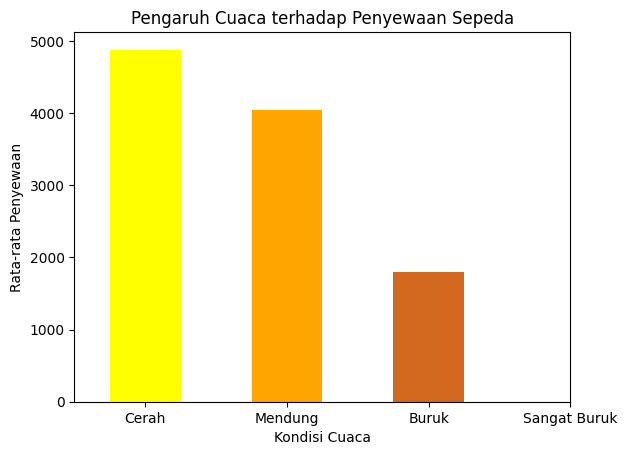

In [6]:
# Visualisasi pengaruh cuaca
weather_effect.plot(kind="bar", color=["yellow", "orange", "chocolate", "red"])
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([0, 1, 2, 3], ["Cerah", "Mendung", "Buruk", "Sangat Buruk"], rotation=0)
plt.show()

### Pertanyaan 2:

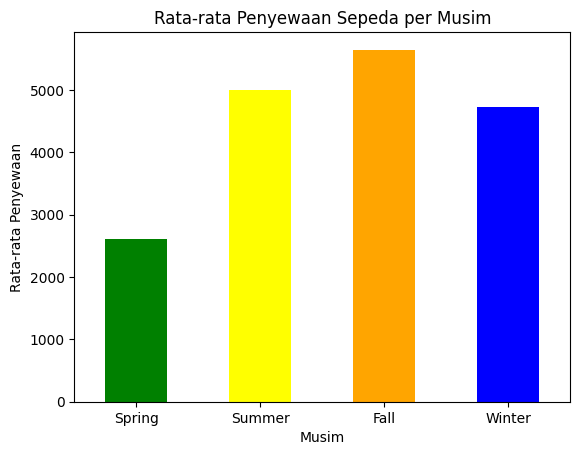

In [ ]:
# Visualisasi pengaruh musim
season_effect.plot(kind="bar", color=["green", "yellow", "orange", "blue"])
plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"], rotation=0)
plt.show()

**Insight:**
- Pengaruh Cuaca terhadap Penyewaan:
> Grafik menunjukkan bahwa cuaca cerah secara signifikan meningkatkan minat orang untuk bersepeda, sehingga semakin cerah cuaca, semakin tinggi pula jumlah penyewaan sepeda.
- Pengaruh Musim terhadap Penyewaan:
> Grafik menunjukkan bahwa musim gugur mencatatkan rata-rata penyewaan sepeda tertinggi, diikuti oleh musim panas dan dingin dengan nilai yang hampir sama. Sementara itu, musim semi memiliki tingkat penyewaan terendah.

## Analisis Lanjutan (Opsional)

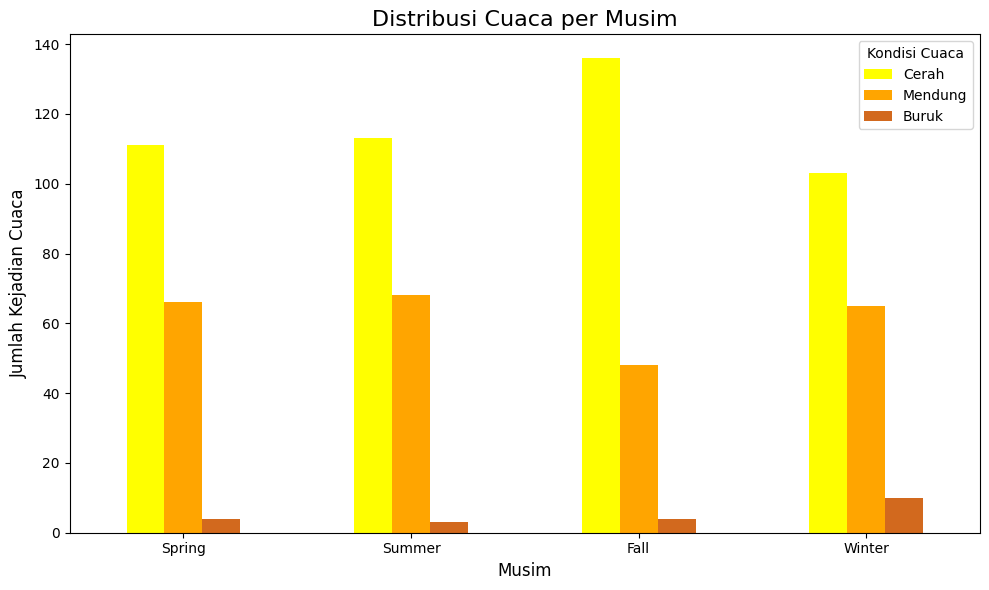

In [7]:
# Menghitung jumlah kejadian cuaca (weathersit) per musim
weather_by_season = data.groupby(['season', 'weathersit']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ["yellow", "orange", "chocolate", "red"]
weather_by_season.plot(kind='bar', stacked=False, ax=ax, color=colors)

ax.set_title('Distribusi Cuaca per Musim', fontsize=16)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Jumlah Kejadian Cuaca', fontsize=12)
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)  # Label musim
ax.legend(title='Kondisi Cuaca', labels=["Cerah", "Mendung", "Buruk", "Sangat Buruk"])

plt.tight_layout()
plt.show()

> secara keseluruhan distribusi cuaca hampir merata di setiap musim, namun pada musim gugur cuaca cerah terlihat paling dominan.

In [8]:
# Menghitung rata-rata temperatur, suhu yang dirasakan, kelembapan, dan kecepatan angin per musim

season_names = ["Spring", "Summer", "Fall", "Winter"]
weather_avg_season = data.groupby('season')[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].mean().reset_index()
weather_avg_season['season_name'] = weather_avg_season['season'].apply(lambda x: season_names[x - 1])
weather_avg_season.sort_values(by='cnt', ascending=False)

,season,temp,atemp,hum,windspeed,cnt,season_name
2,3,0.706309,0.655898,0.633482,0.172095,5644.303191,Fall
1,2,0.544405,0.520307,0.626948,0.203507,4992.331522,Summer
3,4,0.422906,0.415539,0.668719,0.171995,4728.162921,Winter
0,1,0.297748,0.296914,0.582903,0.214537,2604.132597,Spring


> tampak bahwa faktor yang cukup signifikan adalah suhu (temp) dan suhu udara (atemp), di mana keduanya konsisten: semakin tinggi nilai suhu, semakin besar jumlah sewa sepeda (cnt). Sementara itu, kecepatan angin (windspeed) dan kelembapan (humidity) tidak menunjukkan perbedaan yang signifikan.

## Conclusion

- Conclution pertanyaan 1: **Cuaca Memengaruhi Jumlah Penyewaan Sepeda**
> - Kondisi cuaca sangat memengaruhi jumlah penyewaan sepeda. Cuaca cerah (kategori weathersit = 1) memiliki jumlah penyewaan tertinggi, diikuti cuaca sedikit berkabut atau mendung (weathersit = 2). Jumlah penyewaan menurun drastis di cuaca buruk (weathersit = 3), dan tidak ada aktivitas penyewaan saat cuaca sangat buruk (weathersit = 4).
> - Orang-orang cenderung memilih bersepeda di cuaca yang mendukung dan menghindari aktivitas luar ruang saat cuaca buruk.

- Conclution pertanyaan 2: **Musim dengan Rata-rata Penyewaan Tertinggi**
> Musim gugur (fall) memiliki rata-rata penyewaan sepeda tertinggi dibanding musim lainnya. Hal ini berkaitan dengan cuaca cerah yang lebih sering terjadi, serta temperatur (temp) dan suhu yang dirasakan (atemp) yang lebih tinggi dibanding musim lainnya.

- Conclution tambahan:
> Selain cuaca, temperatur (temp) dan suhu yang dirasakan (atemp) juga berpengaruh signifikan. Semakin tinggi temp dan atemp, semakin tinggi jumlah penyewaan sepeda.